# COM-480 Data Visualization
## Project Milestone 2
### Preparation of the data for the statistical plot
Statistical results of comparing each features with CO2 emissions (mean of result by country through time) - bar plot with clic on one bar shows detail for all countries
-> Pearson test if we assume the data is fit for statistical tests, Spearman test otherwise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [3]:
data = pd.read_pickle("data_final.pkl")
data.head()

,dt_year,dt_date,country,region,level_of_development,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,...,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area,IIASA rates of no education projections (IIASA (2015)),GDP (constant 2015 US$),"Literacy rate, adult total (% of people ages 15 and above)",Annual CO₂ emissions (zero filled),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"
0,2002,2002-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,NaN,0.68,0.420344,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.228792e+09,NaN,1340995.0,NaN
1,2003,2003-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.120955,50.00,0.105249,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.867259e+09,NaN,1559602.0,NaN
2,2004,2004-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.176214,57.80,-0.014901,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.978511e+09,NaN,1237247.0,NaN
3,2005,2005-01-01,Afghanistan,Central and Southern Asia,Least Developed,19.32802,0.180929,186.90,0.036212,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.874476e+09,NaN,1889507.0,100.0
4,2006,2006-01-01,Afghanistan,Central and Southern Asia,Least Developed,NaN,0.302234,271.00,0.053648,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9.349917e+09,NaN,2159318.0,NaN


In [5]:
# Do a SpearmanR computation for all country for all features: 
countries = data.country.unique()
features = data.columns
res = pd.DataFrame(columns=features, index = countries)
res = res.drop(['dt_year', 'dt_date', 'country', 'region', 'level_of_development'], axis=1)
res.head(2)

,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,mortality_rate_perc,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area,IIASA rates of no education projections (IIASA (2015)),GDP (constant 2015 US$),"Literacy rate, adult total (% of people ages 15 and above)",Annual CO₂ emissions (zero filled),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for country in countries: 
    for feat in res.columns: 
        feat_dist = list(data[data.country==country][f'{feat}'])
        co2_dist = list(data[data.country==country]['greenhousegas_emissione_mtco2equivalent'])
        # There must be at least 3 values at the same place where co and feat are not NaN
        nas = [~np.isnan(feat_dist[k]) and ~np.isnan(co2_dist[k]) for k in range(len(feat_dist))] # Total number of NaNs at the same indices
  
        if sum(nas) > 3: 
            r = stats.spearmanr(feat_dist, co2_dist, nan_policy='omit').correlation
            res.loc[f'{country}', f'{feat}'] = r

In [7]:
res

,greenhousegas_emissione_mtco2equivalent,total_government_revenue_proportion_of_gdp_perc,fdi_inflows_millionusd,annual_growth_rate_perc,proportion_of_population_with_primary_reliance_on_clean_fuels_a,mortality_rate_perc,renewable_energy_share_on_the_total_energy_consumption,co2emissions_from_fuel_combustion_in_millions_of_tonnes,fossilfuel_subsidies_consumption_and_production_billionusd,randd_expenditure_proportionofgdp_perc,national_action_plans_as_priority_national_policies,number_of_companies_publishing_sustainability_reports,education_for_sustainable_development,enhance_policy_coherence_for_sustainable_development,land_degraded_over_total_land_area,IIASA rates of no education projections (IIASA (2015)),GDP (constant 2015 US$),"Literacy rate, adult total (% of people ages 15 and above)",Annual CO₂ emissions (zero filled),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,1.0,0.738095,0.714286,0.261905,0.928571,NaN,0.190476,-0.299407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928571,NaN,0.595238,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Plots for each features
res_feats = res.mean(axis=0)

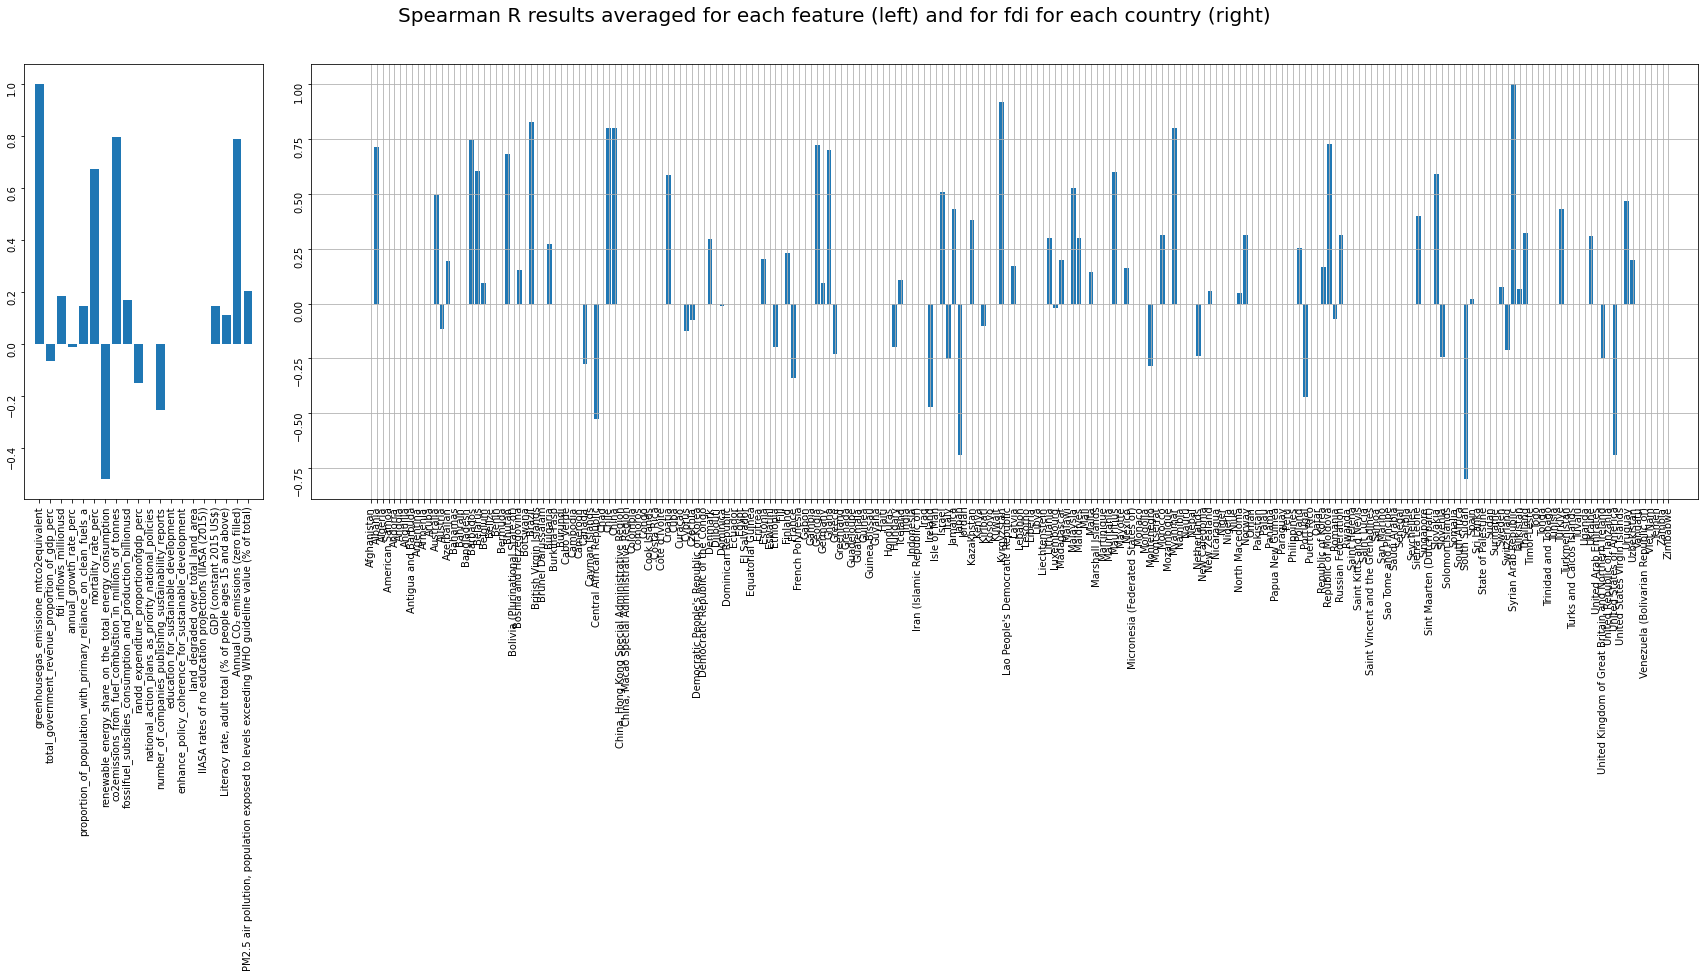

In [9]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1,6)

plt.figure(figsize=(30, 8))

ax = plt.subplot(gs[:, 0])
ax.bar(res_feats.index, res_feats)
ax.tick_params(labelrotation=90)
ax = plt.subplot(gs[:, 1:]) #create the second subplot, that MIGHT be there
ax.bar(res.index, res.fdi_inflows_millionusd) #populate the second subplot
ax.tick_params(labelrotation=90)
ax.grid('on')
plt.suptitle("Spearman R results averaged for each feature (left) and for fdi for each country (right)", fontsize=20)

plt.show()


In [22]:
res_feats_df = pd.DataFrame(columns = ['Features', 'SpearmanR'])
res_feats_df['Features'] = res_feats.index
res_feats_df['SpearmanR'] = res_feats.values

In [26]:
res['Country']=res.index

In [27]:
res_feats_df.to_csv("./stats_res_feats.csv", sep=',')
data.to_csv("./data_final.csv", sep=',')
res.to_csv("./stats_res_all.csv", sep=',')